In [1]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Clustering Jerarquico
* K: # Cluster
* X: Dataset
* n: Numero de datos
* m: Numero de rasgos
* Z: Array enlace de clyuster con información de uniones
    

(150, 2)


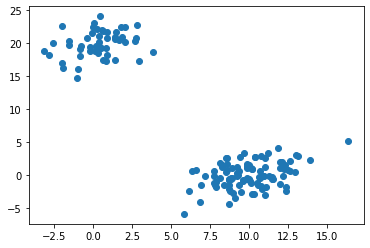

In [2]:
# Generar 2 cluster  c1 1000 c2 50
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size=[50,])
X= np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0] ,  X[:,1])

### Generar la matriz de enlace

In [3]:
Z= linkage(X, "ward")



In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [5]:
c, coph_dist= cophenet(Z, pdist(X))
#Conservacoion de distancias originales c
c


0.9800148387574268

In [6]:
Z[0]
# Se lee: Puntos [52,53] , Long enlace: 0.004151 elementos :2

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [7]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [8]:
Z[152-len(X)] # Cluster 152


array([33.        , 68.        ,  0.07106779,  2.        ])

In [9]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

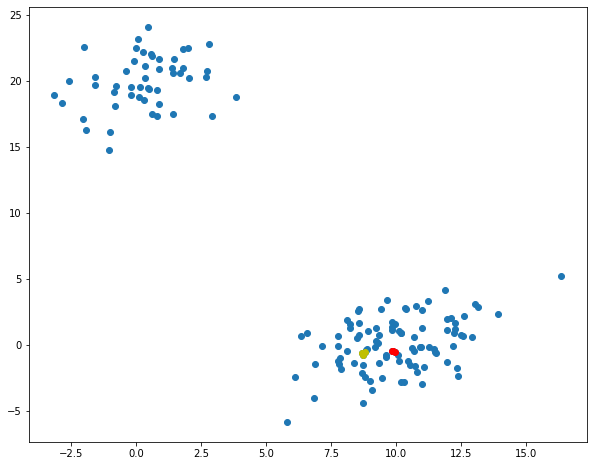

In [10]:
idx=[33,62,68]
idx2=[15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
# DEstacar en Rojo los 3 puntos
plt.scatter(X[idx,0], X[idx,1], c='r')
#Destacar en amarillo el cluster 2
plt.scatter(X[idx2,0], X[idx2,1], c='y')



### Representacion grafica dendograma

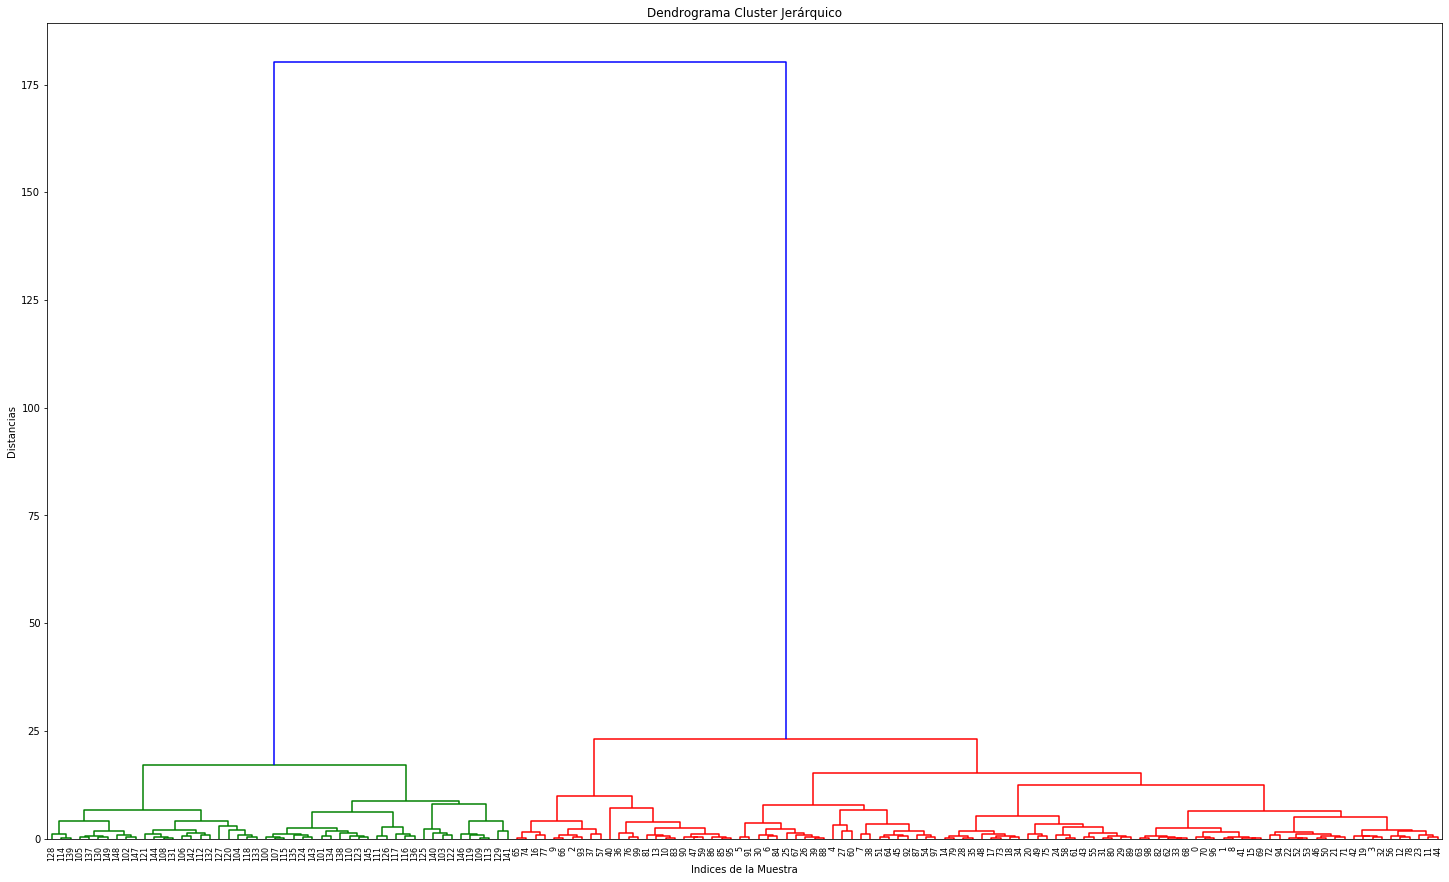

In [11]:
plt.figure(figsize=(25,15))
plt.title("Dendrograma Cluster Jerárquico")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=0.7*180)
plt.show()

In [12]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

In [13]:
### Truncar el dendograma
#### Especificar una version reducida del mismo

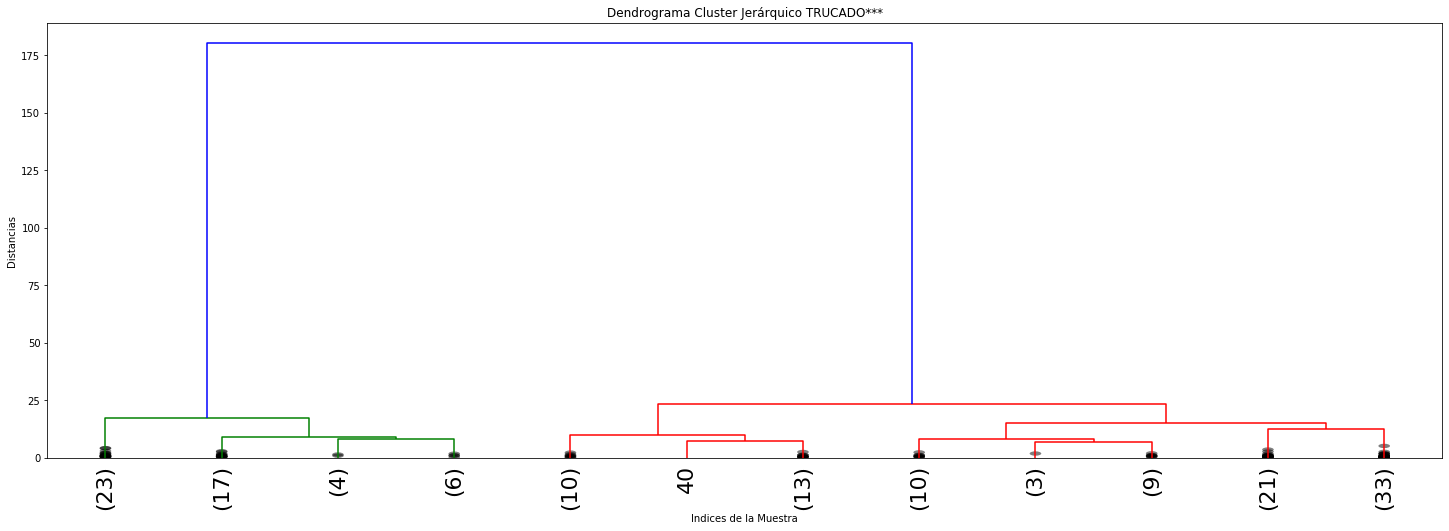

In [14]:
plt.figure(figsize=(25,8))
plt.title("Dendrograma Cluster Jerárquico TRUCADO***")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=22., color_threshold=0.7*180, truncate_mode='lastp', p=12, show_leaf_counts=True, show_contracted=True )
plt.show()

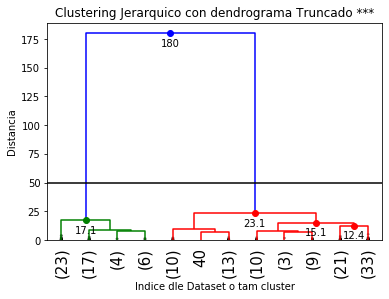

In [27]:
#### DEndrograma tuneado
def tunned(*args, **kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
    annotate_above=kwargs.pop('annotate_above', 0)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering Jerarquico con dendrograma Truncado ***")
        plt.xlabel("Indice dle Dataset o tam cluster")
        plt.ylabel("Distancia")
        for i ,d, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x= 0.5 * sum(i[1:3])
            y= d[1]
            if y>annotate_above:
                plt.plot(x,y, 'o', c=color)
                plt.annotate('%.3g' %y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata
        
tunned(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=15, show_contracted=True , annotate_above=10, max_d=50)

plt.show()

#### Corte automatico del Dendrograma

In [29]:
from scipy.cluster.hierarchy import inconsistent

In [34]:
depth=3
incons=inconsistent (Z,depth)
incons[-10:]
#Devuelve array con: Promedio, desv std, count elementos, Factor inconsistencia c/u uniones

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### MEtodo del codo para definir  profundidad

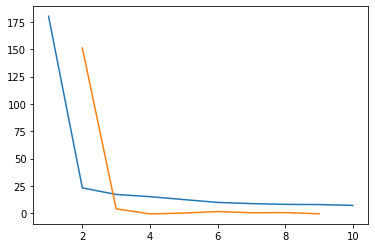

El numero optimo de clusters es  2


In [49]:
last=Z[-10:,2]
last_rev= last[::-1]
last_rev
idx=np.arange(1, len(last)+1)
plt.plot(idx, last_rev)
acc= np.diff(last,2)
acc_rev=acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k=acc_rev.argmax()+2
print("El numero optimo de clusters es  %s" %str(k))

### Caso con 3 distribuciones  distintas adicionales 


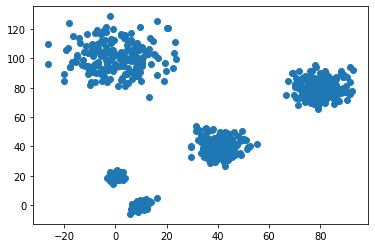

In [54]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2= np.concatenate((X,c,d,e,))
plt.scatter(X2[:,0], X2[:,1])
plt.show()

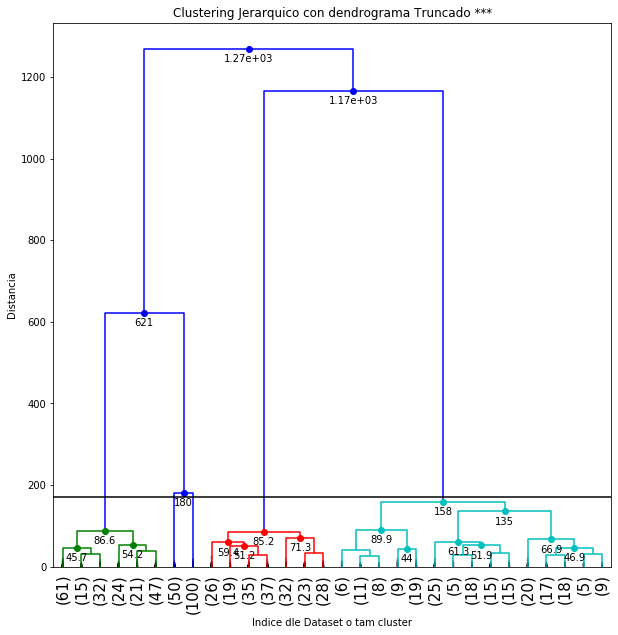

In [63]:
Z2=linkage(X2, 'ward')
plt.figure(figsize=(10,10))
tunned(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=15.,
    show_contracted=True,
    annotate_above=40,
    max_d=170
)
plt.show()

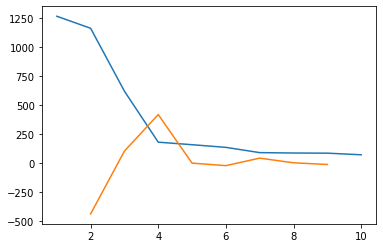

El numero optimo de clusters es  4


In [66]:
last=Z2[-10:,2]
last_rev= last[::-1]
last_rev
idx=np.arange(1, len(last)+1)
plt.plot(idx, last_rev)
acc= np.diff(last,2)
acc_rev=acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k=acc_rev.argmax()+2
print("El numero optimo de clusters es  %s" %str(k))

In [68]:
print(inconsistent(Z2,5)[-10:])

[[ 10.19342332  13.71488886  29.           4.45490364]
 [ 19.61844466  20.51758577  31.           3.19623275]
 [ 17.07773542  18.00213638  31.           3.86109463]
 [ 15.84605122  19.01462538  25.           3.89374706]
 [ 24.37473975  26.95185391  30.           4.12081518]
 [ 35.276937    35.69858984  31.           3.44709087]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.54030743 112.39176765  31.           5.13890756]
 [ 79.97052952 204.43570302  31.           5.30792049]
 [147.19421596 306.37502126  31.           3.66175718]]


### Recuperar lso cluster y sus elementos

In [72]:
from scipy.cluster.hierarchy import fcluster

In [76]:
max_d=20
clusters=fcluster(Z,max_d, criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
k=3
clusters=fcluster(Z,k, criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [80]:
k=3
clusters=fcluster(Z,8, depth=10)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

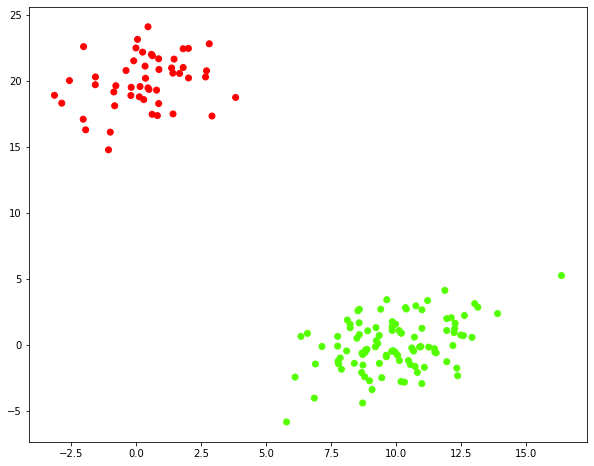

In [85]:
k=2
clusters=fcluster(Z,k, criterion="maxclust")
clusters
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="prism")
plt.show()

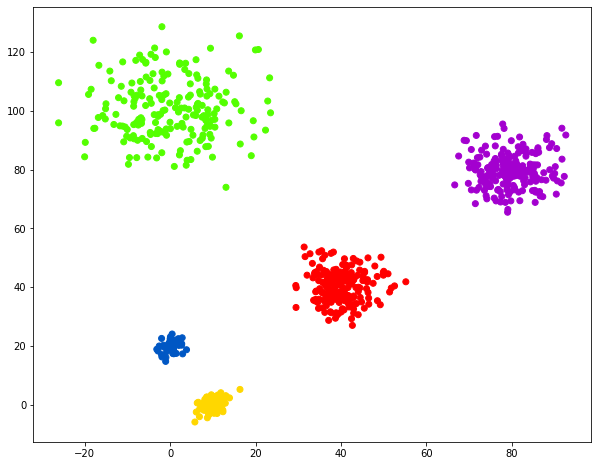

In [88]:
max_d=170
clusters=fcluster(Z2,max_d, criterion="distance")
clusters
plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c=clusters, cmap="prism")
plt.show()